In [1]:
import random

from typing import List, Tuple

import time

# Лабораторная работа 1. Методы сортировки

Вариант: 15

## Сортировка вставками (insertion sort)

### Классификация алгоритма:

- По типу алгоритма: простой алгоритм сортировки

- По устойчивости: устойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 

  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n^2)$

### Описание алгоритма:

Сортировка вставками — алгоритм сортировки, в котором элементы входной последовательности просматриваются по одному, и каждый новый поступивший элемент размещается в подходящее место среди ранее упорядоченных элементов

Сортировка обычно выполняется на месте, путем итерации массива, увеличения отсортированных списков за ним. В каждой позиции массива он сверяет значение там с наибольшим значением в отсортированном списке (которое оказывается рядом с ним, в предыдущей позиции массива). Если он больше, он оставляет элемент на месте и переходит к следующему. Если меньше, он находит правильное положение в отсортированном списке, смещает все большие значения вверх, чтобы создать пространство, и вставляет в правильное положение.

Графический пример работы сортировки:

![SegmentLocal](src/insertionSortGif.gif "segment")

### Блок-схема алгоритма

![img](./src/insertionSort.png)

### Псевдокод алгоритма
```
InsertionSort(A)
  for i = 1 to length(A) - 1
    key = A[i]
    j = i - 1
    while j >= 0 and A[j] > key
      A[j+1] = A[j]
      j = j - 1
    A[j+1] = key
```

### Реализация алгоритма

Достоинства алгоритма:

    -- простота реализации

    -- быстрота работы на малых массивах


Недостатки:

    -- низкая эффективность на больших массивах

In [2]:
def insertionSort(array):

    for step in range(1, len(array)):
        key = array[step]
        j = step - 1
        
        # Сравнивайте ключ с каждым элементом слева от него, пока не будет найден элемент, меньший, чем он.
        # В порядке убывания измените key<array[j] на key>array[j].       
        while j >= 0 and key < array[j]:
            array[j + 1] = array[j]
            j = j - 1
        
        # Поместите ключ после элемента, который меньше его.
        array[j + 1] = key
    return array
        
        
arr = list(random.sample(range(10), 10))
print(arr)
print(insertionSort(arr))

[9, 0, 8, 7, 2, 5, 1, 4, 3, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Ручная трассировка

![img](./src/tracing1.png)
![img](./src/tracing2.png)
![img](./src/tracing3.png)
![img](./src/tracing4.png)
![img](./src/tracing5.png)

In [3]:
### Тестирование программы

sortmethod = insertionSort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'

In [4]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))

### Замер времени сортировки для массивов разной величины

In [9]:
from datetime import datetime

size_list = [0, 1000, 5000, 10000, 25000]
cpu_times = {
    'sort_array' : [],
    'reverse_array' : [],
    'random_array' : []
}
for size in size_list:
    # for sort_array
    start_time = datetime.now()
    sortmethod(list(get_sort_array(size)))
    cpu_times['sort_array'].append(str(datetime.now() - start_time))

    # for reverse_array
    start_time = datetime.now()
    sortmethod(list(get_reverse_array(size)))
    cpu_times['reverse_array'].append(str(datetime.now() - start_time))

    # for random_array
    start_time = datetime.now()
    sortmethod(list(get_random_array(size)))
    cpu_times['random_array'].append(str(datetime.now() - start_time))

### График зависимости

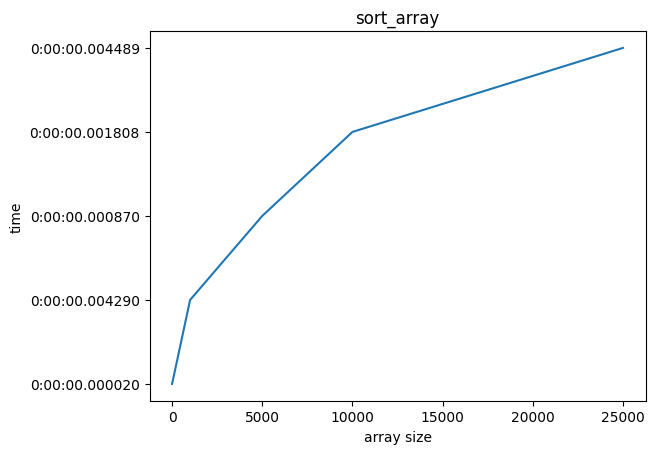

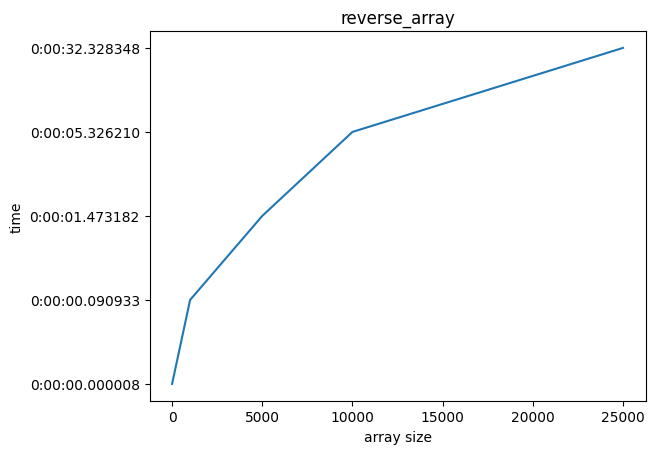

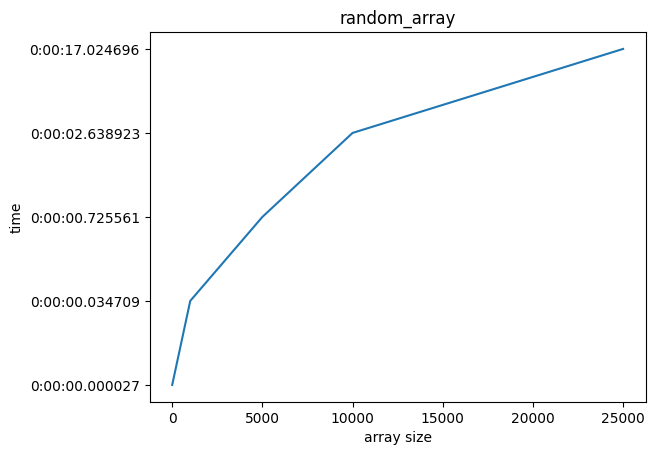

In [10]:
from matplotlib import pyplot

for key in cpu_times:
    pyplot.plot(size_list, cpu_times[key])
    pyplot.title(key)
    pyplot.xlabel('array size')
    pyplot.ylabel('time')
    pyplot.show()
pyplot.show()

На основе полученных результатов, можно сделать вывод, что сортировка вставками работает эффективно только на массивах малых размеров.

### Литература

Томас Х. Кормен, Чарльз И. Лейзерсон, Рональд Л. Ривест, Клиффорд Штайн. Алгоритмы: построение и анализ, 3-е издание = Introduction to Algorithms, Third Edition. — М.: «Вильямс», 2013. — 1328 с. — ISBN 978-5-8459-1794-2.

https://ru.wikipedia.org/wiki/Сортировка_вставками

https://habr.com/ru/post/181271/

https://www.programiz.com/dsa/insertion-sort